# Dask DataFrame

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* Макрушин С.В. Лекция "Dask DataFrame"
* https://docs.dask.org/en/latest/dataframe.html
* Jesse C. Daniel. Data Science with Python and Dask. 

* https://docs.dask.org/en/stable/generated/dask.dataframe.DataFrame.memory_usage_per_partition.html#dask.dataframe.DataFrame.memory_usage_per_partition
* https://docs.dask.org/en/stable/generated/dask.dataframe.DataFrame.map_partitions.html#dask.dataframe.DataFrame.map_partitions
* https://docs.dask.org/en/stable/generated/dask.array.histogram.html
* https://docs.dask.org/en/stable/dataframe-categoricals.html
* https://docs.dask.org/en/stable/generated/dask.dataframe.DataFrame.pivot_table.html#dask.dataframe.DataFrame.pivot_table
* https://docs.dask.org/en/stable/generated/dask.dataframe.groupby.DataFrameGroupBy.apply.html
* https://docs.dask.org/en/stable/generated/dask.dataframe.Series.map_overlap.html#dask.dataframe.Series.map_overlap

* https://docs.dask.org/en/stable/best-practices.html
* https://docs.dask.org/en/stable/dashboard.html
* https://distributed.dask.org/en/stable/client.html

## Задачи для совместного разбора

In [2]:
import dask

1\. Создать `dask.DataFrame`. Рассмотреть основные возможности (выбор строк, группировки, работа с датами, добавление столбцов)

In [3]:
df = dask.datasets.timeseries(start='2000-01-01', end='2003-10-10')

In [4]:
df["xy"] = df["x"] + df["y"]
df

,id,name,x,y,xy
npartitions=1378,,,,,
2000-01-01,int32,object,float64,float64,float64
2000-01-02,...,...,...,...,...
...,...,...,...,...,...
2003-10-09,...,...,...,...,...
2003-10-10,...,...,...,...,...


In [5]:
df.size.compute()

595296000

In [6]:
df[df["name"]=="Edith"].size.compute()

22895755

In [ ]:
%%time
df.groupby(df.index.dt.to_period("M"))["x"].max().compute()

2\. Рассмотреть средства диагностики `dask`

In [77]:
from dask.diagnostics import ProgressBar

In [ ]:
with ProgressBar():
    df.groupby(df.index.dt.to_period("M"))["x"].max().compute()

In [ ]:
!pip install "dask[distributed]" --upgrade

In [ ]:
!pip install dask.distributed

In [ ]:
from dask.distributed import Client
import dask.utils

In [ ]:
client = Client()
client

In [ ]:
%%time
df.groupby(df.index.dt.to_period("M"))["x"].max().compute()

3\. Изучить, как влияет вызов `persist` на производительность

In [ ]:
female = {"Edith", "Wendy", "Quinn", "Hannah", "Ursula", "Laura", "Sarah", "Alice"}

In [ ]:
female_df = df[df["name"].isin(female)].persist()

In [ ]:
%%time
female_df.groupby("name")["x"].max().compute()

In [ ]:
%%time
(female_df["x"] * 2).std().compute()

## Лабораторная работа 13

__При решении данных задач не подразумевается использования циклов или генераторов Python в ходе работы с пакетами `numpy`, `pandas` и `dask`, если в задании не сказано обратного. Решения задач, в которых для обработки массивов `numpy`, структур `pandas` или структур `dask` используются явные циклы (без согласования с преподавателем), могут быть признаны некорректными и не засчитаны.__

В ходе выполнения все операции вычислений проводятся над `dask.DataFrame` и средствами пакета `dask`, если в задании не сказано обратного. Переход от `dask.DataFrame` к `pd.DataFrame` возможен исключительно для демонстрации результата в конце решения задачи. Если в задаче используются результаты выполнения предыдущих задач, то подразумевается, что вы используете результаты в виде `dask.DataFrame` (то есть то, что было получено до вызова `compute`, а не после).

1\. В архиве `recipes_full.zip` находятся файлы, содержащие информацию об рецептах блюд. Загрузите данные из файлов этого архива в виде `dd.DataFrame` с названием `recipes`. Укажите, что в столбце `submitted` содержатся даты. Выведите на экран информацию о количестве сегментов и типе столбцов. Выведите на экран 5 первых и 5 последних строк таблицы. В случае сообщения об ошибке объясните причину и исправьте ошибку.

In [1]:
import dask
import dask.dataframe as dd
import numpy as np
import re
import dask.bag as db
import json

In [44]:
recipes = dd.read_csv('recipes_full/recipes_full_*.csv', parse_dates=['submitted'], dtype={'minutes': 'float64',
       'n_steps': 'float64'})

In [45]:
recipes

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
npartitions=8,,,,,,,,
,int64,object,float64,int64,datetime64[ns],float64,object,int64
,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...


In [4]:
recipes.head(5)

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970,vant ivoire mickies nothing,33.0,803776,2019-08-22,4.0,pat and gina neely and their family own and op...,9
1,1089012,kremsils mariposa baccala cookies class borage...,23.0,51579,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5
2,1428572,tania lander,0.0,68884,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5
3,1400250,heloise milli asher doogh zojirushi,24.0,678862,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1
4,387709,nutty chocolate chunk cookies,47.0,489552,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10


In [46]:
recipes.tail(5)

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
278949,1029131,tuti waffle snackies steakhouse,19.0,171345,1973-10-18,4.0,"according to a providence journal article, ama...",4
278950,1700703,noelias cheats crocante fleisch zitumbuwa,1.0,30228,2007-07-01,6.0,if possible sauté the onions and garlic in abo...,1
278951,1910650,rubbed restuffed pelmeni bedouin flavourful,60.0,591905,2009-09-26,3.0,another great recipe to add to the growing swe...,2
278952,713836,stems polpettine peezi,NaN,357389,2003-09-30,4.0,adapted from top secret recipes. love this!,9
278953,660699,clementines,64.0,29196,1973-06-03,6.0,this would make a great start to your holiday ...,8


In [47]:
#Предполагаю, что ошибка была вызвана тем, что в столбцах 'minutes' и 'n_steps' были Nan, которые меняли тип данных на float, 
#когда dask ожидал int

2\. Выведите на экран следующую информацию:
* количество сегментов в таблице
* объем используемой памяти каждого сегмента
* количество строк в каждом сегменте
* количество строк во всей таблице.

In [6]:
recipes.npartitions

8

In [7]:
recipes.memory_usage_per_partition().compute()

0    17853248
1    17853248
2    17853248
3    17853248
4    17853248
5    17853184
6    17853184
7    17853184
dtype: int64

In [8]:
recipes.map_partitions(len).compute()

0    278955
1    278955
2    278955
3    278955
4    278955
5    278954
6    278954
7    278954
dtype: int64

In [9]:
recipes.shape[0].compute()

2231637

3\. В архиве `recipes_additional.zip` находятся файлы, содержащие информацию об рецептах блюд, полученные из другого источника. В связи с этим названия и количество столбцов в этих данных отличаются от того, что находится в архиве `recipes_full.zip`.

Объедините два набора набора данных, согласовав названия столбцов и форматы данных. Добавьте столбец с информацией о том, из какого датасета была получены данные.

In [10]:
recipes_additional = dd.read_csv('recipes_additional/recipes_additional_*.csv')

In [11]:
recipes['id'] = recipes['id'].astype('object')
recipes['contributor_id'] = recipes['contributor_id'].astype('float64')
recipes['source'] = 'recipes_full'
recipes['#tags'] = np.nan
recipes['views_30_days'] = np.nan

In [12]:
recipes_additional['hours'] = (recipes_additional['hours']*60).round()

In [13]:
recipes_additional['date_of_publication'] = dd.to_datetime(recipes_additional['date_of_publication'], format='%d/%m/%Y')

In [14]:
recipes_additional['source'] = 'recipes_additional'
recipes_additional['contributor_id'] = np.nan
recipes_additional['n_steps'] = np.nan
recipes_additional['#tags'] = recipes_additional['#tags'].astype('float64')
recipes_additional['views_30_days'] = recipes_additional['views_30_days'].astype('float64')
recipes_additional = recipes_additional[['recipe_id', 'name', 'hours', 'contributor_id', 'date_of_publication', 
                                         'n_steps', 'description', '#ingredients', 'source', '#tags', 'views_30_days']]
recipes_additional = recipes_additional.rename(columns={'hours': 'minutes', 'date_of_publication': 'submitted',
                                                        '#ingredients': 'n_ingredients', 'recipe_id': 'id'})

In [15]:
recipes_all = dd.concat([recipes, recipes_additional])

In [16]:
recipes_all.head()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients,source,#tags,views_30_days
0,683970,vant ivoire mickies nothing,33.0,803776.0,2019-08-22,4.0,pat and gina neely and their family own and op...,9,recipes_full,NaN,NaN
1,1089012,kremsils mariposa baccala cookies class borage...,23.0,51579.0,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5,recipes_full,NaN,NaN
2,1428572,tania lander,0.0,68884.0,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5,recipes_full,NaN,NaN
3,1400250,heloise milli asher doogh zojirushi,24.0,678862.0,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1,recipes_full,NaN,NaN
4,387709,nutty chocolate chunk cookies,47.0,489552.0,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10,recipes_full,NaN,NaN


4\. Выясните, сколько рецептов содержат слово `chocolate`. Выведите на экран набор уникальных идентификаторов авторов таких рецептов.

In [17]:
patt = re.compile(r"chocolate", re.I)
recipes_all['name'].dropna().apply(lambda x: bool(re.findall(patt, x)), meta=recipes_all['name']).sum().compute()

20042

In [18]:
recipes_all.dropna(subset=['name'])[recipes_all['name'].dropna().apply(lambda x: bool(re.findall(patt, x)), meta=recipes_all['name'])]['contributor_id'].unique().dropna().compute()

0       489552.0
1       869184.0
2       705251.0
3       897375.0
4        20754.0
          ...   
4452     20591.0
4453    179232.0
4454    294700.0
4455    737510.0
4456    146121.0
Name: contributor_id, Length: 4457, dtype: float64

5\. При помощи функции `da.histogram` посчитайте значения для построения гистограммы для столбца `n_ingredients`. Визуализируйте полученные результаты при помощи функции `plt.bar`. Добавьте на рисунок 2 вертикальные линии, соответствующие квантилям уровней 0.25 и 0.75. Сделайте масштаб вертикальной оси логарифмическим.

Допускается вычисление статистики по столбцу (применение метода `compute`) до того, как будет вызван `da.histogram`. 

In [19]:
import dask.array as da
import matplotlib.pyplot as plt

In [48]:
max_c = recipes_all['n_ingredients'].max()
min_c = recipes_all['n_ingredients'].min()
q25_c = recipes_all['n_ingredients'].quantile(0.25)
q75_c = recipes_all['n_ingredients'].quantile(0.75)

maxx, minn, q25, q75 = dask.compute(max_c, min_c, q25_c, q75_c)

In [52]:
hist = da.histogram(recipes_all['n_ingredients'], bins=int(maxx), range=[int(minn), int(maxx)])[0].compute()
hist

array([222068, 224158, 229388, 234947, 240720, 244359, 247178, 246746,
       246814,  22429,  19094,  15165,  11640,   8284,   6014,   4145,
         2793,   1913,   1279,    852,    529,    346,    244,    178,
          107,     68,     55,     33,     22,     20,     13,      5,
            4,      3,      4,      1,      2,      1,      1,      2,
            0,      0,      1], dtype=int64)

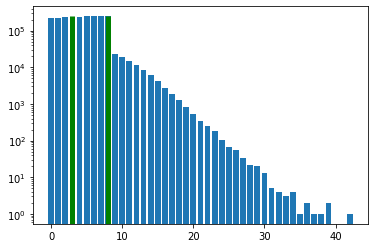

In [53]:
fig, ax = plt.subplots(1,1)
ax.bar(da.arange(len(hist)).compute(), hist)
ax.set_yscale('log')
ax.vlines(int(q25), ymin = 0, ymax=hist.max(), color='g', linewidth=5)
ax.vlines(int(q75), ymin = 0, ymax=hist.max(), color='g', linewidth=5)

6\. Постройте сводную таблицу при помощи метода `pivot_table`, где по строкам располагаются года, по столбцам - названия месяцев, а в ячейках содержится средняя длина рецептов в данный год и месяц.

In [23]:
recipes_all_copy = recipes_all.copy()

In [24]:
recipes_all_copy['month'] = recipes_all_copy['submitted'].dt.strftime("%b")
recipes_all_copy = recipes_all_copy.categorize("month")
recipes_all_copy['year'] = recipes_all_copy['submitted'].dt.year
recipes_all_copy['length'] = recipes_all_copy['description'].str.len()
recipes_all_copy.pivot_table(index='year', columns='month', values='length').compute()

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1970,204.743408,201.592264,196.511615,198.976998,194.211685,201.172783,199.581201,198.050389,196.566187,199.625639,206.498984,199.370236
1971,203.798455,195.267616,197.191810,198.856700,200.299394,201.036535,199.724068,201.915196,198.508459,195.389332,202.278381,200.267076
1972,199.460172,203.465734,203.374162,194.692833,195.848539,204.667570,197.980155,202.721978,199.239502,201.296646,193.696409,199.734598
1973,202.358706,206.146683,203.699964,196.466889,198.947340,197.152116,197.559700,197.828733,197.080493,201.453022,200.148816,205.587410
1974,199.502091,195.584543,204.759358,199.025040,195.917653,197.746106,198.805302,199.132952,200.917806,200.406334,197.327583,198.797416
1975,201.146491,200.305395,200.505536,200.407312,198.143105,196.192651,194.287446,199.301568,201.011991,197.568290,205.114549,204.274453
1976,196.745636,195.969126,196.366076,201.185714,198.943800,198.715810,202.197815,197.132375,197.568981,200.285714,204.071542,202.076617
1977,197.121845,199.661128,193.968018,202.463834,196.462697,202.428832,199.456178,204.686787,200.924896,200.174972,197.516556,199.363971
1978,207.647990,196.462838,205.798104,199.084530,201.196545,199.553752,197.827307,199.054488,204.552603,205.180685,202.001080,196.079860


7\. Удалите строки, которые содержат пропуске в столбце `contributor_id` и приведите его тип к целочисленному. Для каждого `contributor_id` найдите топ-5 слов, которых этот пользователь наиболее часто использовал в названиях своих рецептов. Выведите на экран статистику для пользователя с ID 1530.

In [56]:
recipes_all = recipes_all.dropna(subset=['contributor_id'])
recipes_all['contributor_id'] = recipes_all['contributor_id'].astype('int64')
recipes_all = recipes_all.dropna(subset=['name'])

In [57]:
rec_grouped = recipes_all.groupby('contributor_id')['name'].aggregate(list).str.join(' ').str.split().explode().to_frame().persist()

In [59]:
res = rec_grouped.groupby('contributor_id')['name'].apply(lambda x: x.value_counts()[:5], meta=('name', 'f8')).compute()
res

contributor_id              
27              butter          2
                and             2
                elvis           1
                baci            1
                lincoln         1
                               ..
2002289981      bananarollup    1
                gelt            1
                thriller        1
                proto           1
                mates           1
Name: name, Length: 139626, dtype: int64

In [60]:
res[1530]

chocolate    7
muffins      6
bread        5
and          4
whole        3
Name: name, dtype: int64

8\. В файлах архива `site_logs.zip` находятся логи системы. Считайте эти логи в виде `dask.bag`, выделите их них дату, время, id службы, уровень лога и сообщение. Объедините дату и время в одну строку. Преобразуйте `dask.bag` в `dask.dataframe`, предварительно оставив только логи уровня "INFO". Подтвердите корректность решения, выведя на экран уникальные значения столбца `level` полученной таблицы.

```
date(ymd)   time(HMS)   service_id level   msg
081110      103041      34         INFO    dfs.FSNamesystem: BLOCK* NameSystem.delete: ...
```

In [2]:
site_logs = db.read_text('site_logs/logs_a*').map(lambda x: x.split(maxsplit=4)).map(lambda x: [':'.join(x[:2]), *x[2:]])

In [3]:
site_logs = site_logs.remove(lambda x: x[2] != 'INFO').to_dataframe()
site_logs = site_logs.rename(columns={0: 'date(ymd):time(HMS)', 1: 'service_id', 2: 'level', 3: 'msg'})
site_logs['level'].value_counts().compute()

INFO    10812836
Name: level, dtype: int64

9\. Добавьте в таблицу из задания 8 столбец `is_delete_op`, который содержит флаг: является ли данная операция удалением чего-либо или нет. Для выяснения этого факта проанализизируйте сообщение лога. 

Для каждого лога подсчитайте, сколько из записанных перед ним последних 100 логов являются операциями удаления. Для вычислений используйте метод `map_overlap`. Посчитайте и выведите на экран, сколько существует подпоследовательностей не менее чем из 75 сообщений, содержащих операции удаления.

In [4]:
patt_del = re.compile(r"delet", re.I)
site_logs['is_delete_op'] = site_logs['msg'].apply(lambda x: bool(re.findall(patt_del, x)), meta=site_logs['msg'])

In [5]:
site_logs[site_logs['is_delete_op'] == True].compute()

,date(ymd):time(HMS),service_id,level,msg,is_delete_op
72693,081109:204524,19,INFO,dfs.FSDataset: Deleting block blk_-82133444492...,True
77700,081109:204600,19,INFO,dfs.FSDataset: Deleting block blk_-68998694356...,True
78180,081109:204603,19,INFO,dfs.FSDataset: Deleting block blk_-81916773454...,True
78331,081109:204604,19,INFO,dfs.FSDataset: Deleting block blk_-91943911636...,True
80928,081109:204623,19,INFO,dfs.FSDataset: Deleting block blk_355791412606...,True
...,...,...,...,...,...
175447,081111:110816,19,INFO,dfs.FSDataset: Deleting block blk_908502654627...,True
175448,081111:110816,19,INFO,dfs.FSDataset: Deleting block blk_911957082328...,True
175449,081111:110816,19,INFO,dfs.FSDataset: Deleting block blk_912178470539...,True
175450,081111:110817,19,INFO,dfs.FSDataset: Deleting block blk_920065832088...,True


In [6]:
site_logs['is_delete_op'].astype('int64').map_overlap(lambda x: x.rolling(100).sum(), 100, 0).compute()

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
175605    0.0
175606    0.0
175607    0.0
175608    0.0
175609    0.0
Name: is_delete_op, Length: 10812836, dtype: float64

In [7]:
site_logs['is_delete_op'].astype('int64').map_overlap(lambda x: x.rolling(75).sum() == 75, 75, 0).sum().compute()

2538031

10\. Сгруппируйте таблицу с логами по часу, в котором был оставлен лог. Под часом имеется в виду час конкретного дня, то связь связка год-месяц-день-час.  Посчитайте, сколько логов было записано за каждый час. Визуализируйте полученную динамику. Добавьте подписи засечек, подписи осей и название рисунка.

In [36]:
site_logs['date(ymd):time(HMS)'] = site_logs['date(ymd):time(HMS)'].apply(lambda x: list(re.findall(re.compile(r"(\d{6}:\d\d)"), x))[0], meta=site_logs['date(ymd):time(HMS)'])

Text(0.5, 1.0, 'Динамика логов за каждый час')

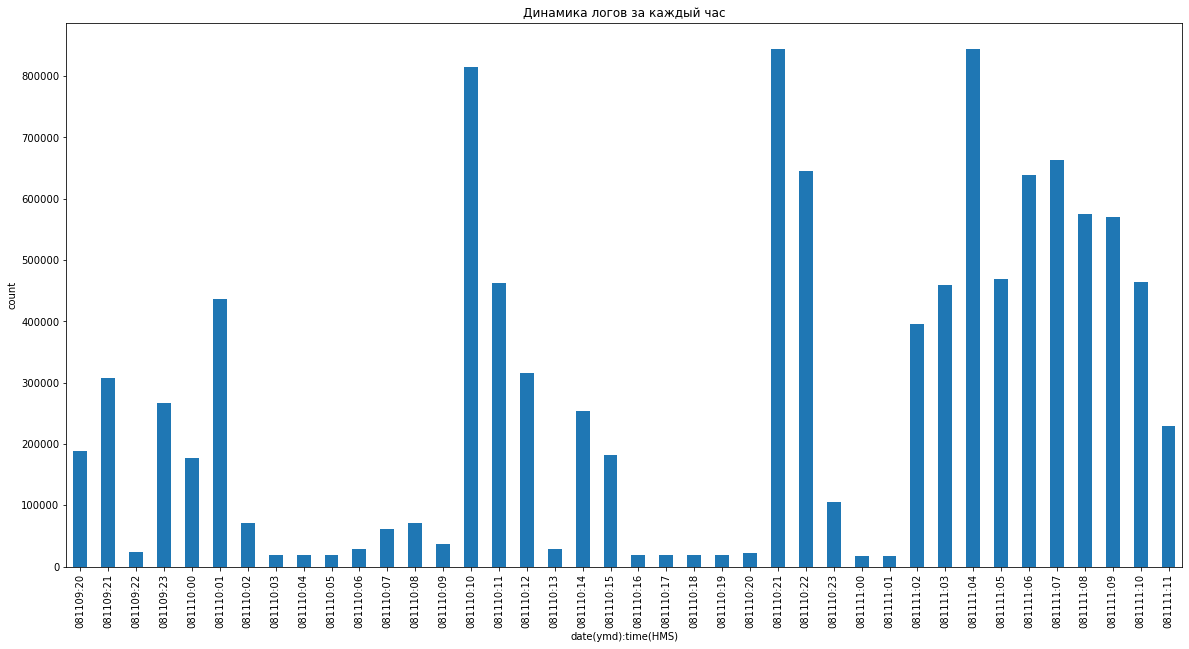

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(20, 10))
site_logs.groupby('date(ymd):time(HMS)')['service_id'].count().compute().plot(kind='bar')
ax.set_ylabel('count')
ax.set_title('Динамика логов за каждый час')